/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


Generated Prompt: A cartoon character with short hair, brown eyes, and freckles, wearing hat


  0%|          | 0/50 [00:00<?, ?it/s]

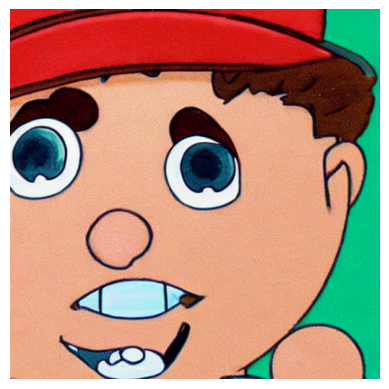

In [2]:
# 🧠 Task 10: Avatar Generator using Stable Diffusion

# Install dependencies
!pip install diffusers transformers torch pillow --quiet

import random
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

# Load the pre-trained Stable Diffusion model
model = StableDiffusionPipeline.from_pretrained(
    'CompVis/stable-diffusion-v1-4',
    torch_dtype=torch.float16
)
model = model.to('cuda')  # Use GPU if available

# Possible avatar features
hairstyles = ["short hair", "long hair", "curly hair", "straight hair", "ponytail"]
eye_colors = ["blue eyes", "green eyes", "brown eyes", "hazel eyes"]
accessories = ["glasses", "hat", "earrings", "necklace", "headband"]
facial_features = ["round face", "sharp chin", "freckles", "dimples"]

# Function to generate a random avatar prompt
def generate_avatar_prompt():
    hairstyle = random.choice(hairstyles)
    eye_color = random.choice(eye_colors)
    accessory = random.choice(accessories)
    facial_feature = random.choice(facial_features)
    prompt = f"A cartoon character with {hairstyle}, {eye_color}, and {facial_feature}, wearing {accessory}"
    return prompt

# Function to generate an avatar image
def generate_avatar_image(prompt):
    image = model(prompt).images[0]
    return image

# Function to display image
def display_image(image):
    plt.imshow(image)
    plt.axis("off")
    plt.show()

# Generate and display the avatar
avatar_prompt = generate_avatar_prompt()
print("Generated Prompt:", avatar_prompt)
generated_avatar = generate_avatar_image(avatar_prompt)
display_image(generated_avatar)
